<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/12w13w14w_0528_tue_B_ch15_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 12-13-14주차 B반

# 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.5 MB/s eta 0:00:00


## 그래프 설정

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

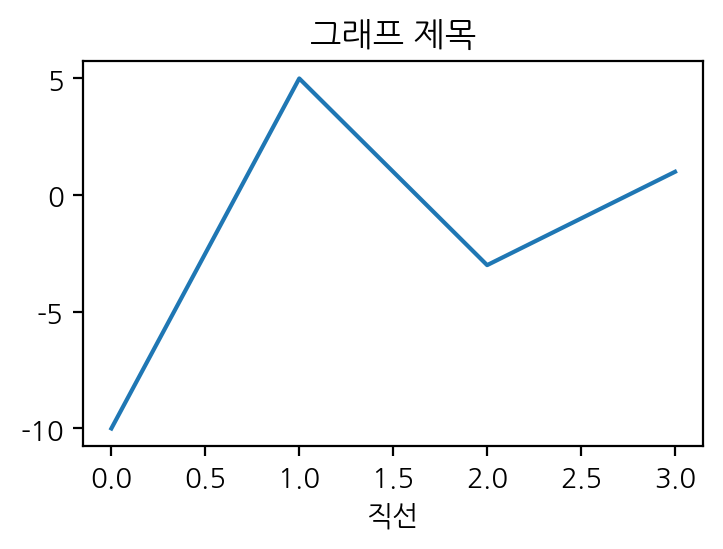

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 4.71 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [9]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 데이터프레임 가로로 여러 개 출력하기

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [11]:
display_side_by_side(exam.head(), exam[['id', 'math', 'english']].head())

id 
 nclass 
 math 
 english 
 science 
 
 
 
 
 0 
 1 
 1 
 50 
 98 
 50 
 
 
 1 
 2 
 1 
 60 
 97 
 60 
 
 
 2 
 3 
 1 
 45 
 86 
 78 
 
 
 3 
 4 
 1 
 30 
 98 
 58 
 
 
 4 
 5 
 2 
 25 
 80 
 65 
 
 
      
 
 
 
 id 
 math 
 english 
 
 
 
 
 0 
 1 
 50 
 98 
 
 
 1 
 2 
 60 
 97 
 
 
 2 
 3 
 45 
 86 
 
 
 3 
 4 
 30 
 98 
 
 
 4 
 5 
 25 
 80

# 15 머신러닝을 이용한 예측 분석

## 15-1 머신러닝 모델 알아보기

### [책 자료](https://dream-be-develop.tistory.com/27)

## 15-2 소득 예측 모델 만들기

### 소득 예측 모델 코딩 절차
- 전처리 -> 모델 만들기 -> 예측 및 성능평가

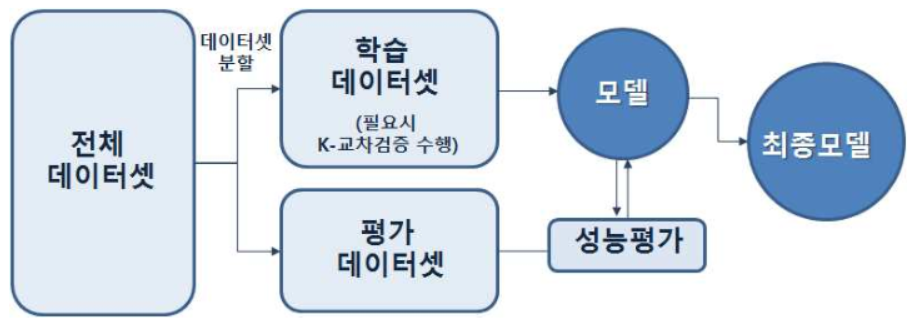

### adult 데이터는 미국인의 성별, 인종, 직업, 학력 등 다양한 인적 정보를 담고 있는 인구 조사 데이터임
- adult 데이터를 이용해 인적 정보로 소득을 예측하는 의사결정나무 모델을 생성, 예측

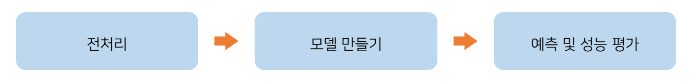



### 예측 변수와 타켓 변수

- 예측 변수(predictor variable): 예측하는데 활용하는 변수 또는 모델에 입력하는 값을 예측 변수라 함.

- 타겟 변수(target variable): 예측하고자 하는 변수 또는 모델이 출력하는 값을 타겟 변수라 함.

- 만약 환자의 성별, 나이, 흡연 여부, 음주 여부로 당뇨병 발병을 예측하는 모델을 만든다면 성별, 나이, 흡연 여부, 음주 여부는 예측 변수로 사용하고, 당뇨병 발병 여부는 타겟 변수로 사용함.

### [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/)

In [12]:
import pandas as pd
df = pd.read_csv('data/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## adult 데이터셋

| 열 이름 |	설명 |	타입 |	예시 |
|---------|------|-------|-------|
| age     | 나이 | 숫자형 |	39, 50, 38|
| workclass	|고용 형태 |	범주형|	'Private', 'Self-emp-not-inc', 'Local-gov' |
|fnlwgt	|샘플 가중치|	숫자형|	77516, 83311, 215646|
|education	|교육 수준|	범주형|	'Bachelors', 'HS-grad', '11th'|
|education_num|	교육 수준을 숫자로 표시|숫자형|	13, 9, 7|
|marital_status|	결혼 상태|	범주형|	'Married-civ-spouse', 'Divorced', Never-married'|
|occupation|	직업|	범주형|	'Tech-support', 'Craft-repair', 'Other-service'|
|relationship|	가족 관계|	범주형|	'Wife', 'Own-child', 'Husband'|
|race|	인종|	범주형|	'White', 'Black', 'Asian-Pac-Islander'|
|sex|	성별|	범주형|	'Male', 'Female'|
|capital_gain|	자본 이익|	숫자형|	2174, 0, 14084|
|capital_loss|	자본 손실|	숫자형|	0, 1902, 1887|
|hours_per_week|	주당 근로 시간|	숫자형|	40, 13, 60|
|native_country|	출신 국가|	범주형|	'United-States', 'Cuba', 'Jamaica'|
|income|	소득 수준 (타겟 열)|	범주형|	'>50K', '<=50K'|

In [13]:
df['native_country'].value_counts()

native_country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [14]:
df['native_country'].value_counts().sort_index()

native_country
?                               857
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua    

In [15]:
df['native_country'].isna().sum()

0

In [16]:
df[df['native_country'] == '?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [17]:
df.query('native_country == "?"')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [18]:
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2149,43,Private,91317,Assoc-acdm,12,Never-married,Craft-repair,Unmarried,White,Female,0,0,40,United-States,<=50K
3049,28,Private,198493,Assoc-acdm,12,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
13772,42,Self-emp-not-inc,99185,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K
44773,20,Private,39234,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,<=50K
38585,32,Private,252257,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,45,United-States,<=50K


In [19]:
df.marital_status.value_counts()

marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [20]:
df['marital_status'].value_counts().sort_index()

marital_status
Divorced                  6633
Married-AF-spouse           37
Married-civ-spouse       22379
Married-spouse-absent      628
Never-married            16117
Separated                 1530
Widowed                   1518
Name: count, dtype: int64

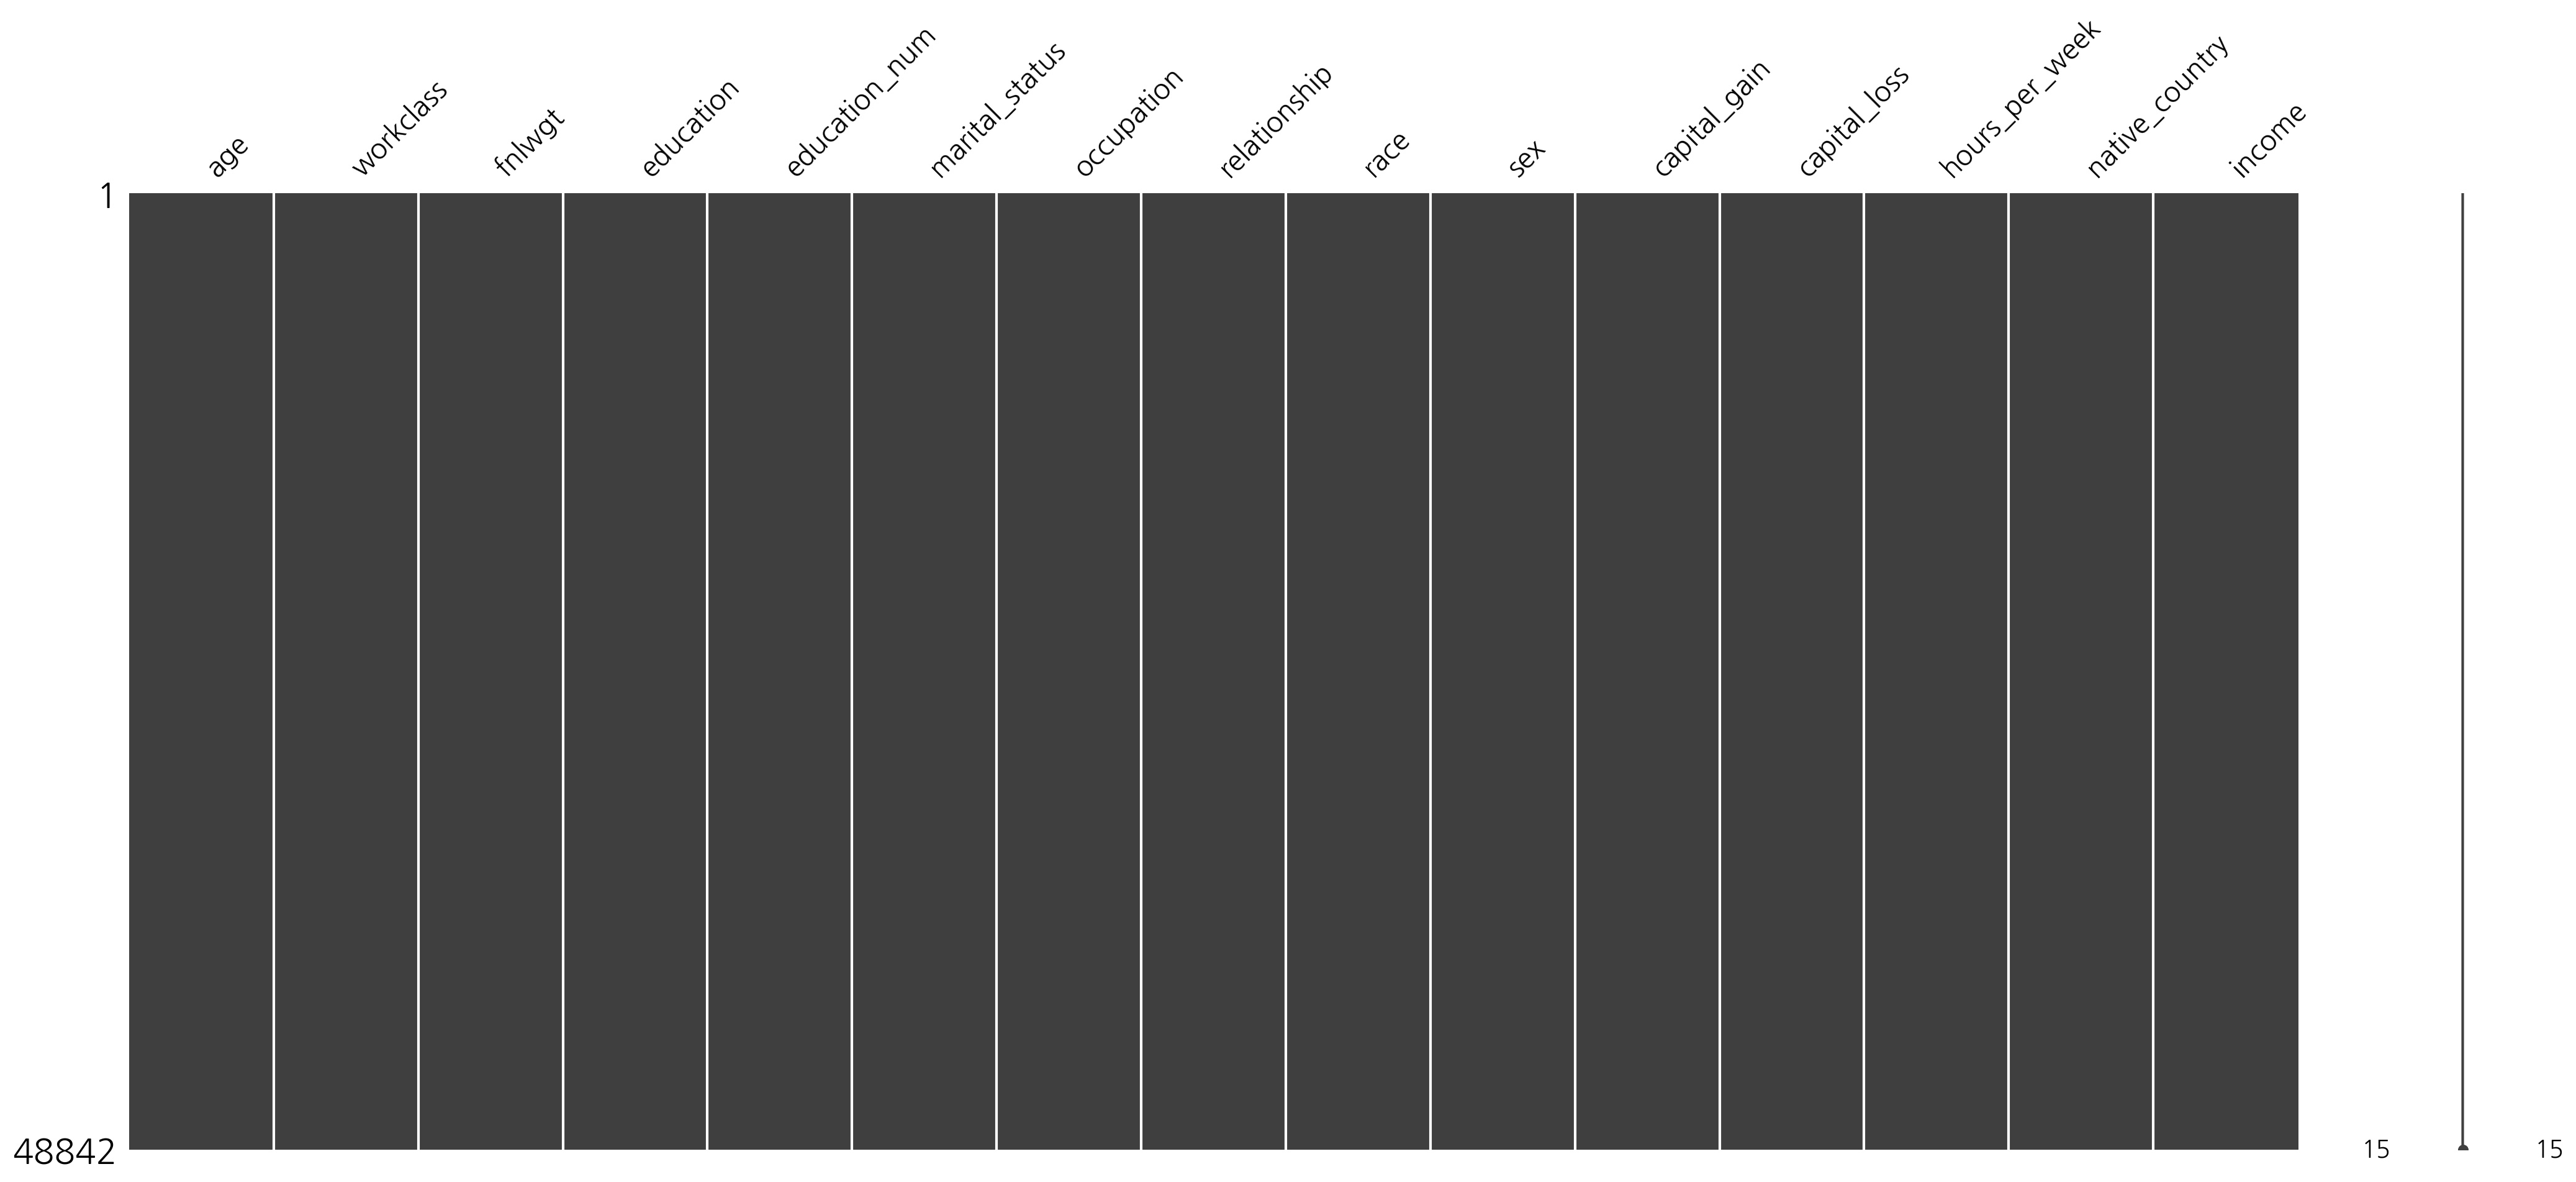

In [21]:
msno.matrix(df);

### 전처리하기

#### 1. 타겟 변수 전처리

In [ ]:
df['income'].value_counts() # 기말시험

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [ ]:
df['income'].value_counts(normalize = True) # 기말시험

income
<=50K    0.76
>50K     0.24
Name: proportion, dtype: float64

In [ ]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize = True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

#### 2. 불필요한 변수 제거하기

In [ ]:
df = df.drop(columns = 'fnlwgt') # 샘플(인구통계가중치), 기말고사

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education_num   48842 non-null  int64 
 4   marital_status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital_gain    48842 non-null  int64 
 10  capital_loss    48842 non-null  int64 
 11  hours_per_week  48842 non-null  int64 
 12  native_country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


#### 3. 문자 타입 변수를 숫자 타입으로 바꾸기

**원핫 인코딩하기**

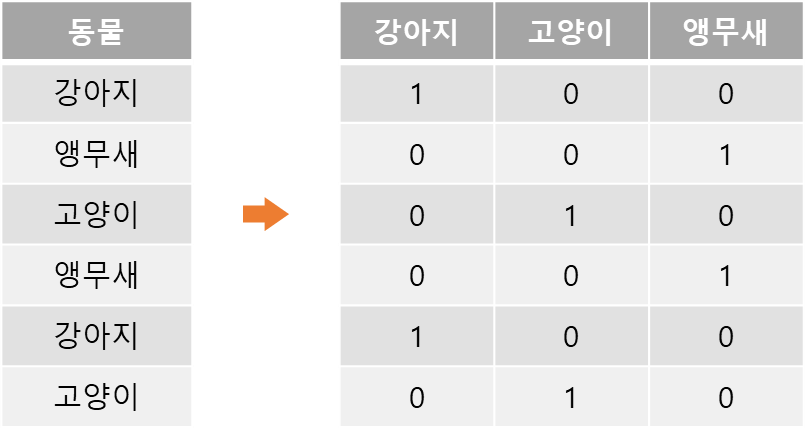

In [ ]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [ ]:
df_tmp['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [ ]:
df_tmp.sample(5)

,sex
35381,Female
32975,Male
17228,Female
27037,Male
39188,Male


In [ ]:
# df_tmp의 문자 타입 변수에 원핫 인코딩 적용
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  bool 
 1   sex_Male    48842 non-null  bool 
dtypes: bool(2)
memory usage: 95.5 KB


In [ ]:
df_tmp.sample(5)

,sex_Female,sex_Male
15541,False,True
23893,False,True
12102,False,True
40098,False,True
21855,False,True


In [ ]:
df_tmp.head()

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [ ]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


## 원 핫 인코딩

In [ ]:
mydf = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
mydf

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [ ]:
pd.get_dummies(mydf)

,C,A_a,A_b,B_a,B_b,B_c
0,1,True,False,False,True,False
1,2,False,True,True,False,False
2,3,True,False,False,False,True


In [ ]:
pd.get_dummies(mydf, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,True,False,False,True,False
1,2,False,True,True,False,False
2,3,True,False,False,False,True


In [ ]:
# df에서 'income' 열만 제외하고 나머지 열만 더미(dummies)를 만들어 df에 반영
target = df['income']             # income 추출

df = df.drop(columns = 'income')  # income 제거
df = pd.get_dummies(df)           # 문자 타입 변수 원핫 인코딩

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 107 entries, age to native_country_Yugoslavia
dtypes: bool(102), int64(5)
memory usage: 6.6 MB


In [ ]:
df.sample(5)

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
17120,63,9,0,0,6,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
17147,21,6,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7405,61,6,0,0,18,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37023,61,13,0,0,60,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
46432,36,10,0,0,48,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df['income'] = target             # df에 target 삽입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: bool(102), int64(5), object(1)
memory usage: 7.0+ MB


In [ ]:
import numpy as np
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  bool  
 6    workclass_Federal-gov                      48842 non-null  bool  
 7    workclass_Local-gov                        48842 non-null  bool  
 8    workclass_Never-worked                     48842 non-null  bool  
 9    workclass_Private                          48842 non-null  bool  
 10   workclass_Self-emp-i

In [ ]:
import numpy as np
df.iloc[:,0:6].info() # 첫 6개의 열로 구성된 df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   education_num   48842 non-null  int64
 2   capital_gain    48842 non-null  int64
 3   capital_loss    48842 non-null  int64
 4   hours_per_week  48842 non-null  int64
 5   workclass_?     48842 non-null  bool 
dtypes: bool(1), int64(5)
memory usage: 1.9 MB


#### 4. 데이터 분할하기

#### `adult` 데이터 분할하기

## [사이킷런 홈페이지](https://scikit-learn.org/stable)

### 사이킷런(Scikit-learn) 개요
- 파이썬에서 사용할 수 있는 머신러닝 라이브러리 중 하나입니다. 이 라이브러리는 간단하고 효과적인 도구를 제공하여 다양한 머신러닝 알고리즘을 사용할 수 있도록 도와줍니다. 사이킷런은 데이터 마이닝과 데이터 분석을 위한 다양한 기능을 제공하며, 사용하기 쉬운 API와 풍부한 문서화로 머신러닝 모델을 개발하고 평가하는 것을 용이하게 합니다.
- 사이킷런은 오픈 소스이며, 다양한 커뮤니티와 개발자들에 의해 지속적으로 유지보수되고 발전하고 있습니다. 이러한 이유로 사이킷런은 파이썬에서 머신러닝을 공부하고 적용하는 데 매우 인기 있는 도구 중 하나입니다.

#### 사이킷런은 다음과 같은 주요 기능을 포함하고 있습니다:

- 다양한 머신러닝 알고리즘 제공: 분류, 회귀, 군집화, 차원 축소 등 다양한 머신러닝 알고리즘을 제공합니다. 이를 통해 사용자는 다양한 문제에 대해 적합한 모델을 선택할 수 있습니다.

- 데이터 전처리 기능: 데이터를 로드하고 전처리하는 기능을 제공합니다. 이를 통해 데이터의 특성 스케일링, 누락된 값 처리, 범주형 데이터 인코딩 등을 수행할 수 있습니다.

- 모델 평가 및 선택: 교차 검증, 그리드 서치와 같은 기능을 통해 모델을 평가하고 최적의 하이퍼파라미터를 선택할 수 있습니다.

- 폭넓은 지원: 다양한 머신러닝 모델에 대한 구현을 제공하며, 파이썬의 다른 과학 및 데이터 분석 라이브러리와의 통합이 원활합니다.



In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
# ! pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율
                                     stratify = df['income'],  # 타겟 변수 비율 유지
                                     random_state = 1234)      # 난수 고정

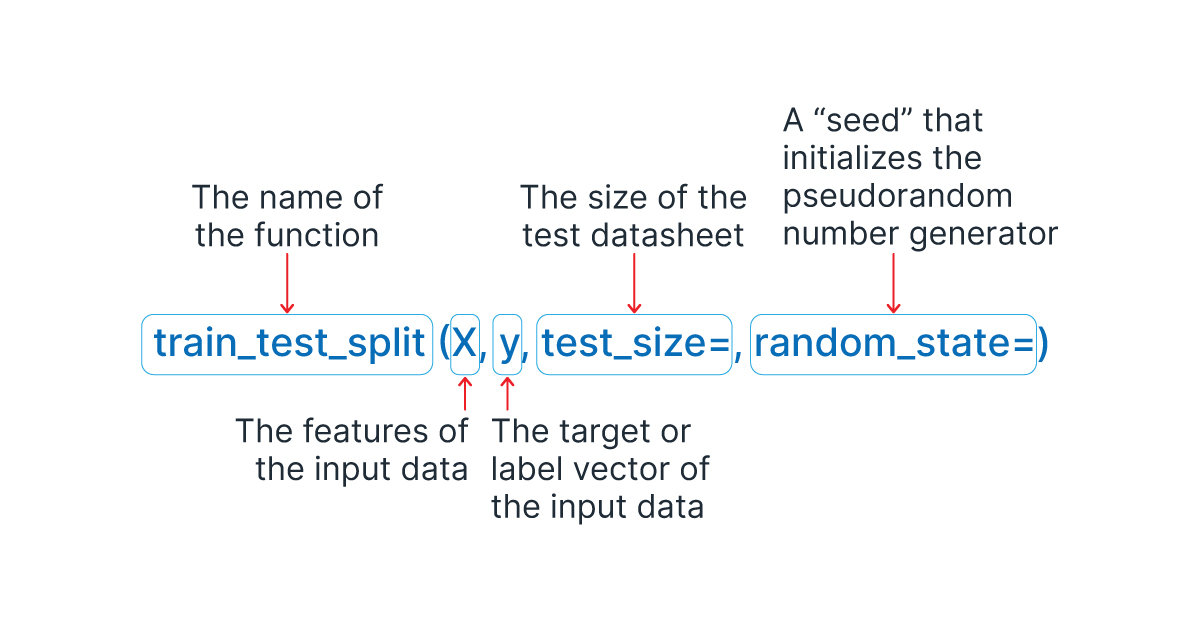

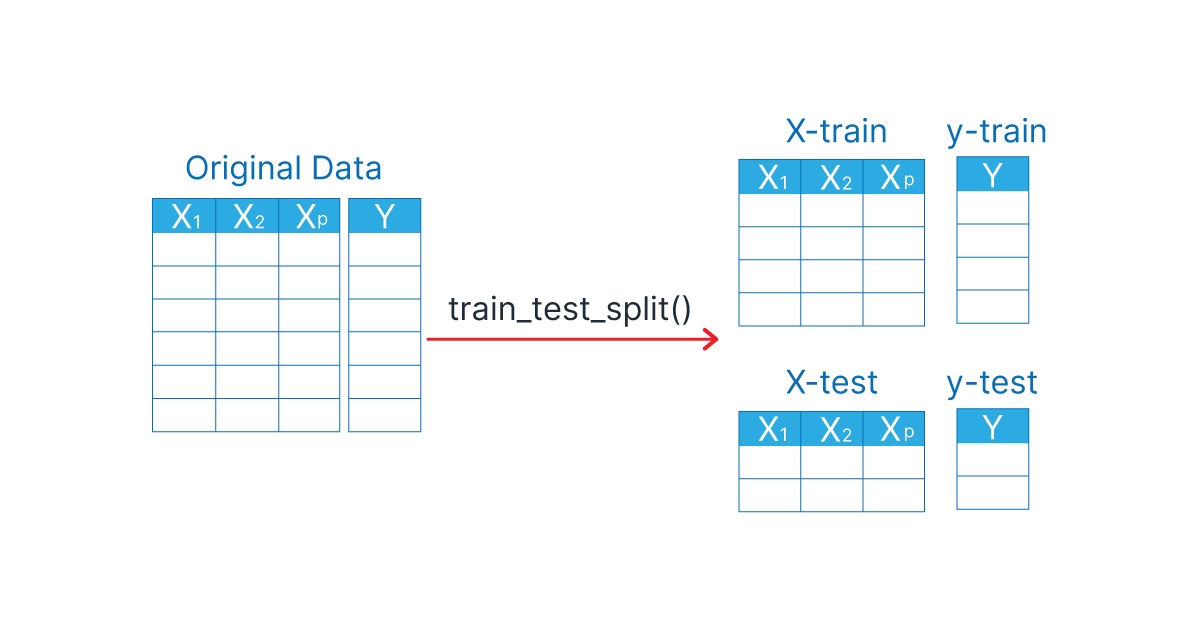

## [위 내용 학습 참조 train_test_split()](https://www.shiksha.com/online-courses/articles/train-test-split/)

In [ ]:
# train
df_train.shape

(34189, 108)

In [ ]:
# test
df_test.shape

(14653, 108)

In [ ]:
# test 데이터가 30% 확인
df_test.shape[0]/(df_train.shape[0] + df_test.shape[0])

0.30000818967282256

In [ ]:
# stratify = df['income'] 확인
# income의 비율이 훈련용과 테스트용이 같도록
# train
df_train['income'].value_counts(normalize = True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

In [ ]:
# test
df_test['income'].value_counts(normalize = True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

## 목표
- 의사결정트리 모델을 만들어 여러 개의 다른 속성으로 속성 income: high / low 맞추기

### 의사결정나무 모델이란?

- 의사결정나무(decision tree)모델은 마치 스무고개 놀이처럼 순서대로 주어진 질문에 yes/no로 답하면 마지막 결론을 얻는 구조로 되어 있음. 질문이 나열된 모양이 가지를 뻗은 '나무'와 비슷하고, 예측값을 무엇으로 할지 '의사 결정'해 주기 때문에 의사결정나무라는 이름을 가지고 있음.

### 의사결정나무 이해

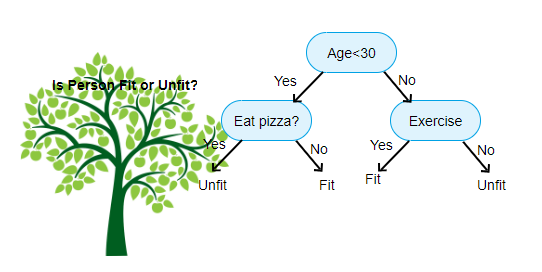

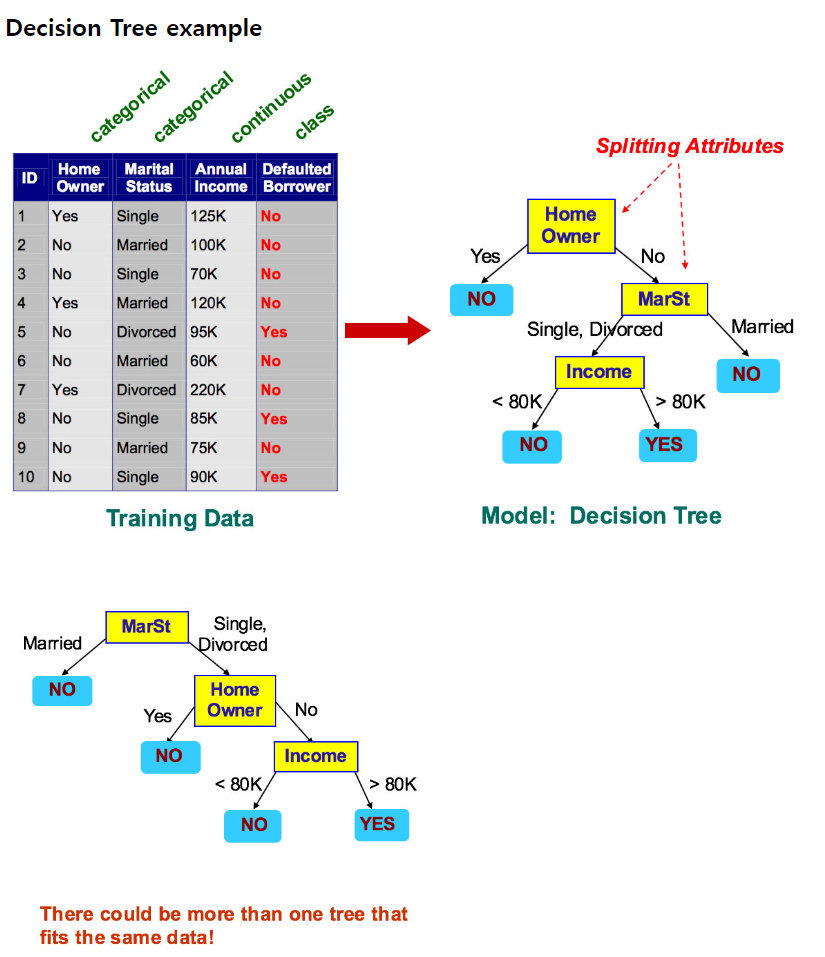

### 의사결정나무 모델 만들기

#### 모델 설정하기

In [ ]:
from sklearn import tree
# 모델 만들기
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정 # 시험문제 출제
                                  max_depth = 3)        # 나무 깊이

#### 모델 만들기

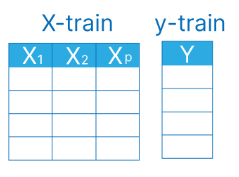

In [ ]:
train_x = df_train.drop(columns = 'income')  # 예측 변수 추출
train_y = df_train['income']                 # 타겟 변수 추출

In [ ]:
df_train[['age', 'education_num', 'capital_gain', 'income']].head()

,age,education_num,capital_gain,income
42105,35,13,0,low
758,62,9,0,low
19450,41,9,0,low
19815,21,10,0,low
21620,20,10,0,low


In [ ]:
display_side_by_side(train_x.iloc[:, :4].head(), train_y.to_frame().head())

age 
 education_num 
 capital_gain 
 capital_loss 
 
 
 
 
 42105 
 35 
 13 
 0 
 0 
 
 
 758 
 62 
 9 
 0 
 0 
 
 
 19450 
 41 
 9 
 0 
 0 
 
 
 19815 
 21 
 10 
 0 
 0 
 
 
 21620 
 20 
 10 
 0 
 0 
 
 
      
 
 
 
 income 
 
 
 
 
 42105 
 low 
 
 
 758 
 low 
 
 
 19450 
 low 
 
 
 19815 
 low 
 
 
 21620 
 low

In [ ]:
model = clf.fit(X = train_x, y = train_y)    # 모델 훈련하기

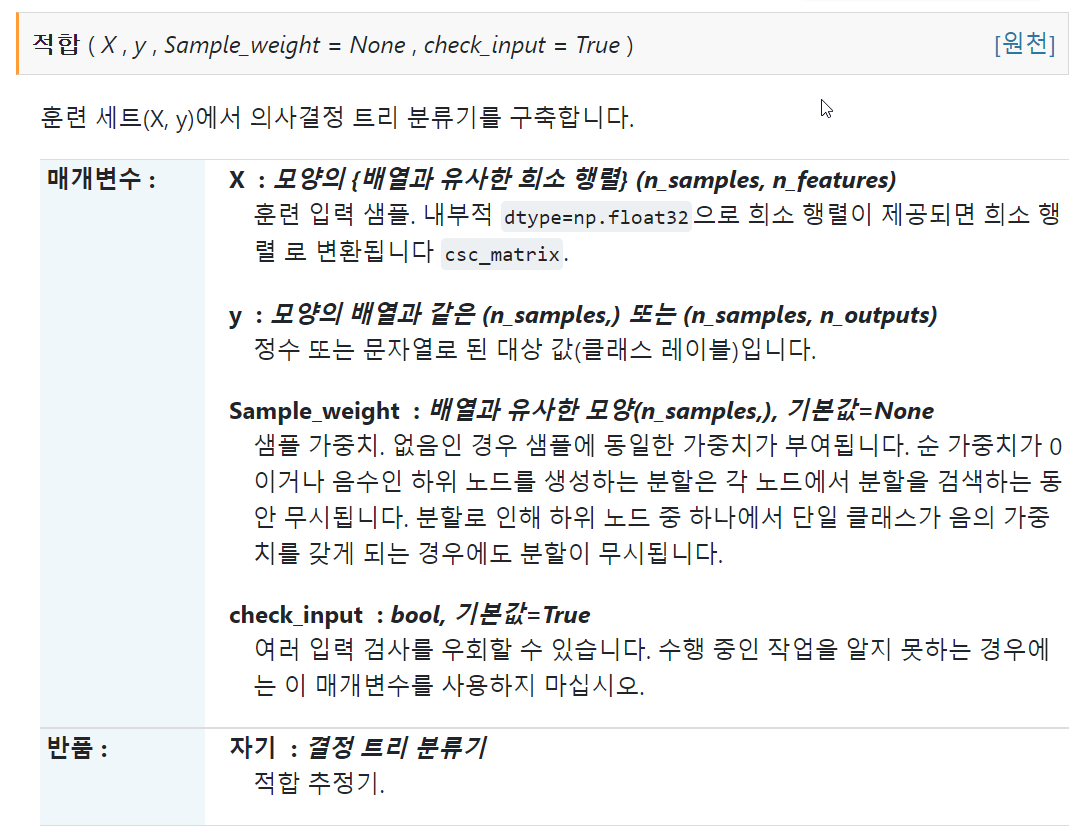

In [ ]:
df_train['marital_status_Married-civ-spouse'].value_counts()

marital_status_Married-civ-spouse
False    18525
True     15664
Name: count, dtype: int64

In [ ]:
df_train['marital_status_Married-civ-spouse'].value_counts(normalize = True)

marital_status_Married-civ-spouse
False    0.54
True     0.46
Name: proportion, dtype: float64

### 모델 구조 살펴보기

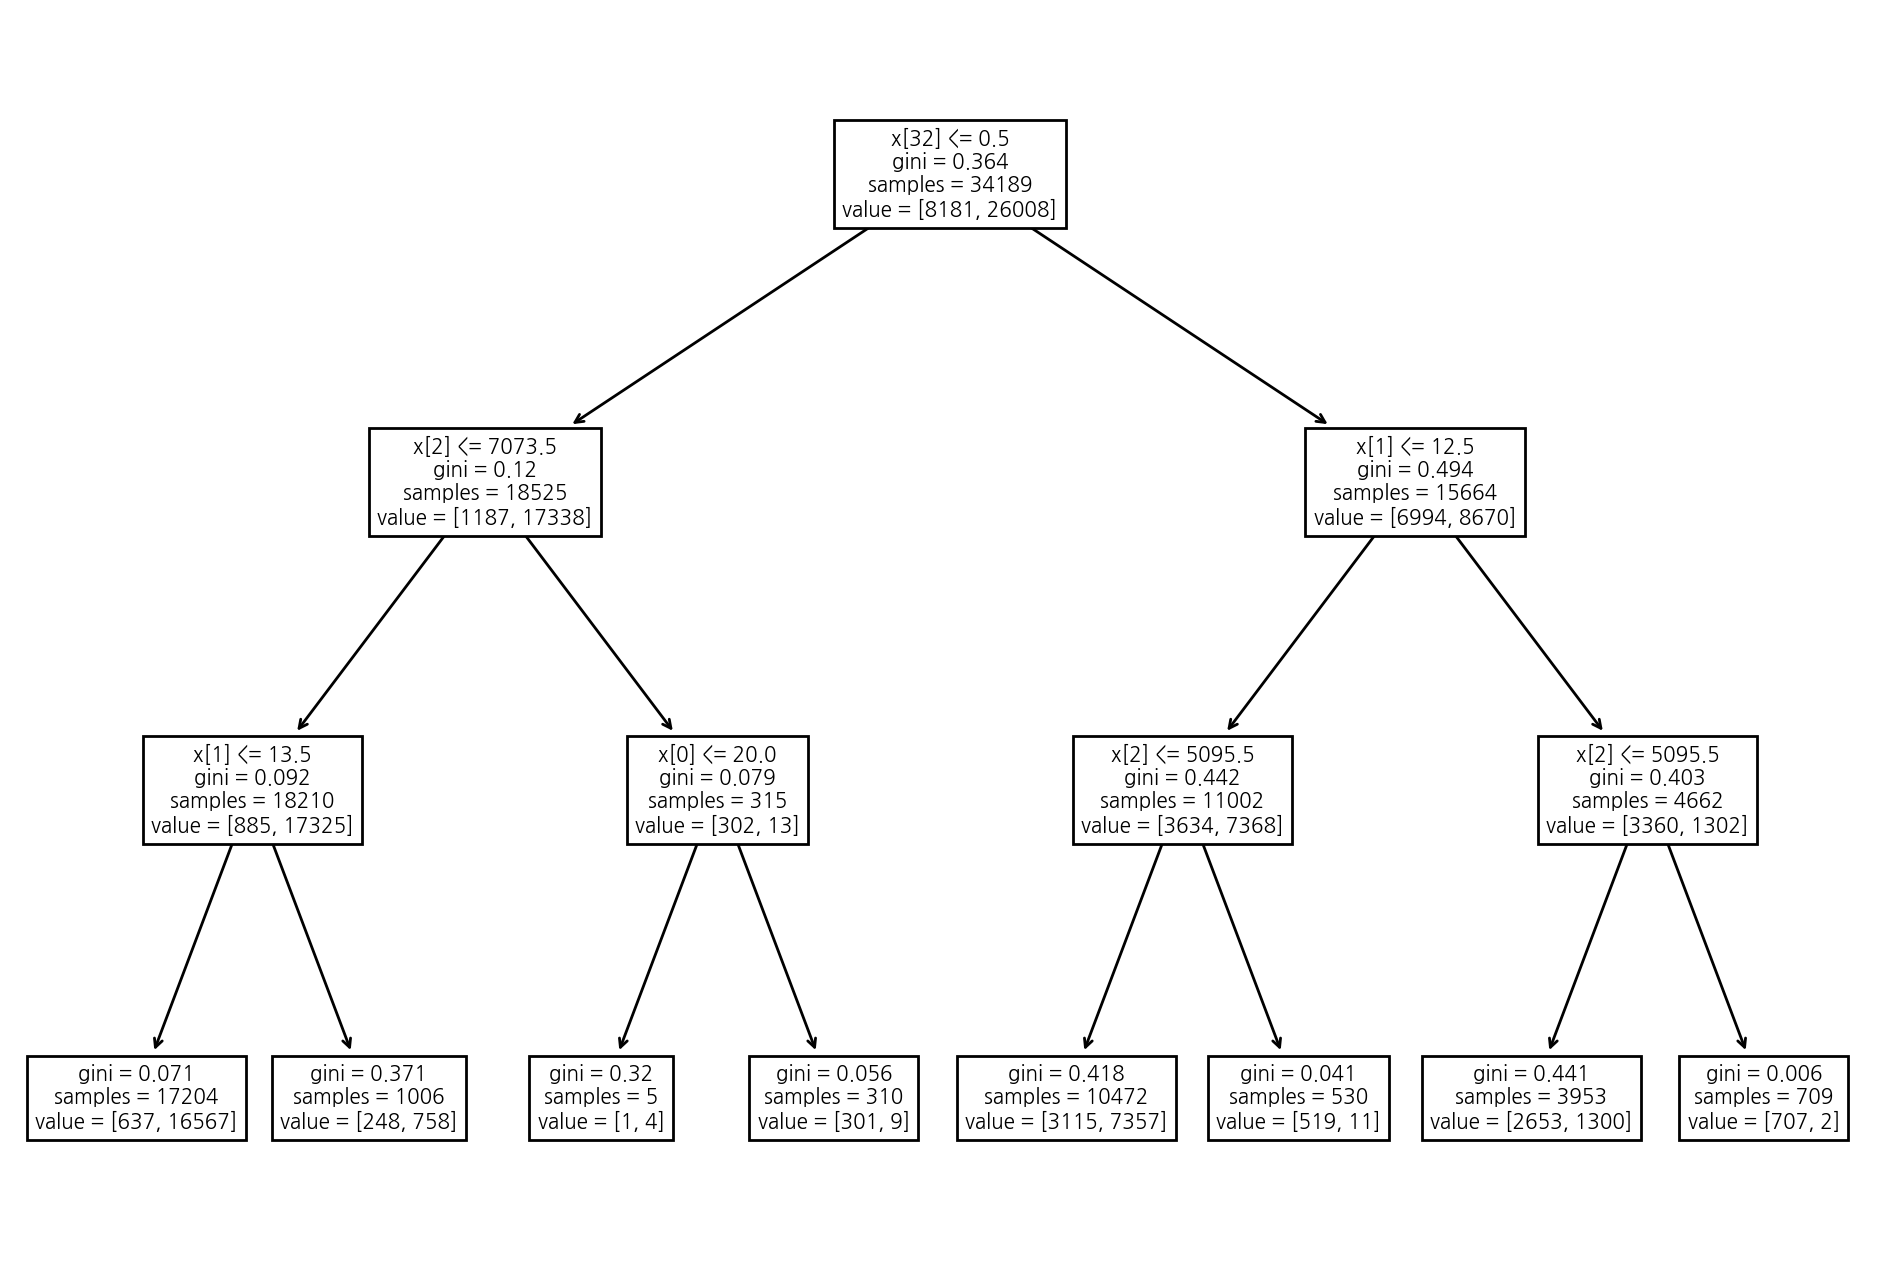

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi'     : '100',     # 그래프 크기 설정
                     'figure.figsize' : [12, 8]})  # 해상도 설정
tree.plot_tree(model);                             # 그래프 출력
# 결과의 첫 노드에서 기준 (x[32] <= 0.5)으로 다음 노드로 이동
# 첫 노드의 내부에는 총 34189의 관측 값에서 income이 high = 8181, low = 26008 인 상태
# x[32] <= 0.5 가 True이면(즉, 기준 충족) 왼쪽 트리(['결혼해 배우자가 있음(결혼상태)' == 0: 없음])로 진행
# x[33] <= 0.5 가 Flase이면(즉, 기준 충족하지 않으면) 오른쪽 트리(['결혼해 배우자가 있음(결혼상태)' == 1: 있음])로 진행
# 간단히 말해, 비혼이면 왼쪽, 결혼이면 오른쪽

### 결과의 첫 노드에서 기준 (x[32] <= 0.5)으로 다음 이동
- 현 노드에서 income이 high = 8181, low = 26008 인 상태
- x[33] <= 0.5 가 True이면 왼쪽 트리(['결혼해 배우자가 있음(결혼상태)' == 0: 없음])로 진행
- x[33] <= 0.5 가 Flase이면 오른쪽 트리(['결혼해 배우자가 있음(결혼상태)' == 1: 있음])로 진행

In [ ]:
8181 / (8181 + 26008)

0.23928749012840386

### 지니(gini)계수
- 불평등의 정도를 나타내는 통계학적 지수
- 서로 다른 데이터가 비슷하게 있을수록 지니 지수는 높아짐
- 정보 이득의 최대화 -> 불순도의 감소 -> 지니 지수 감소


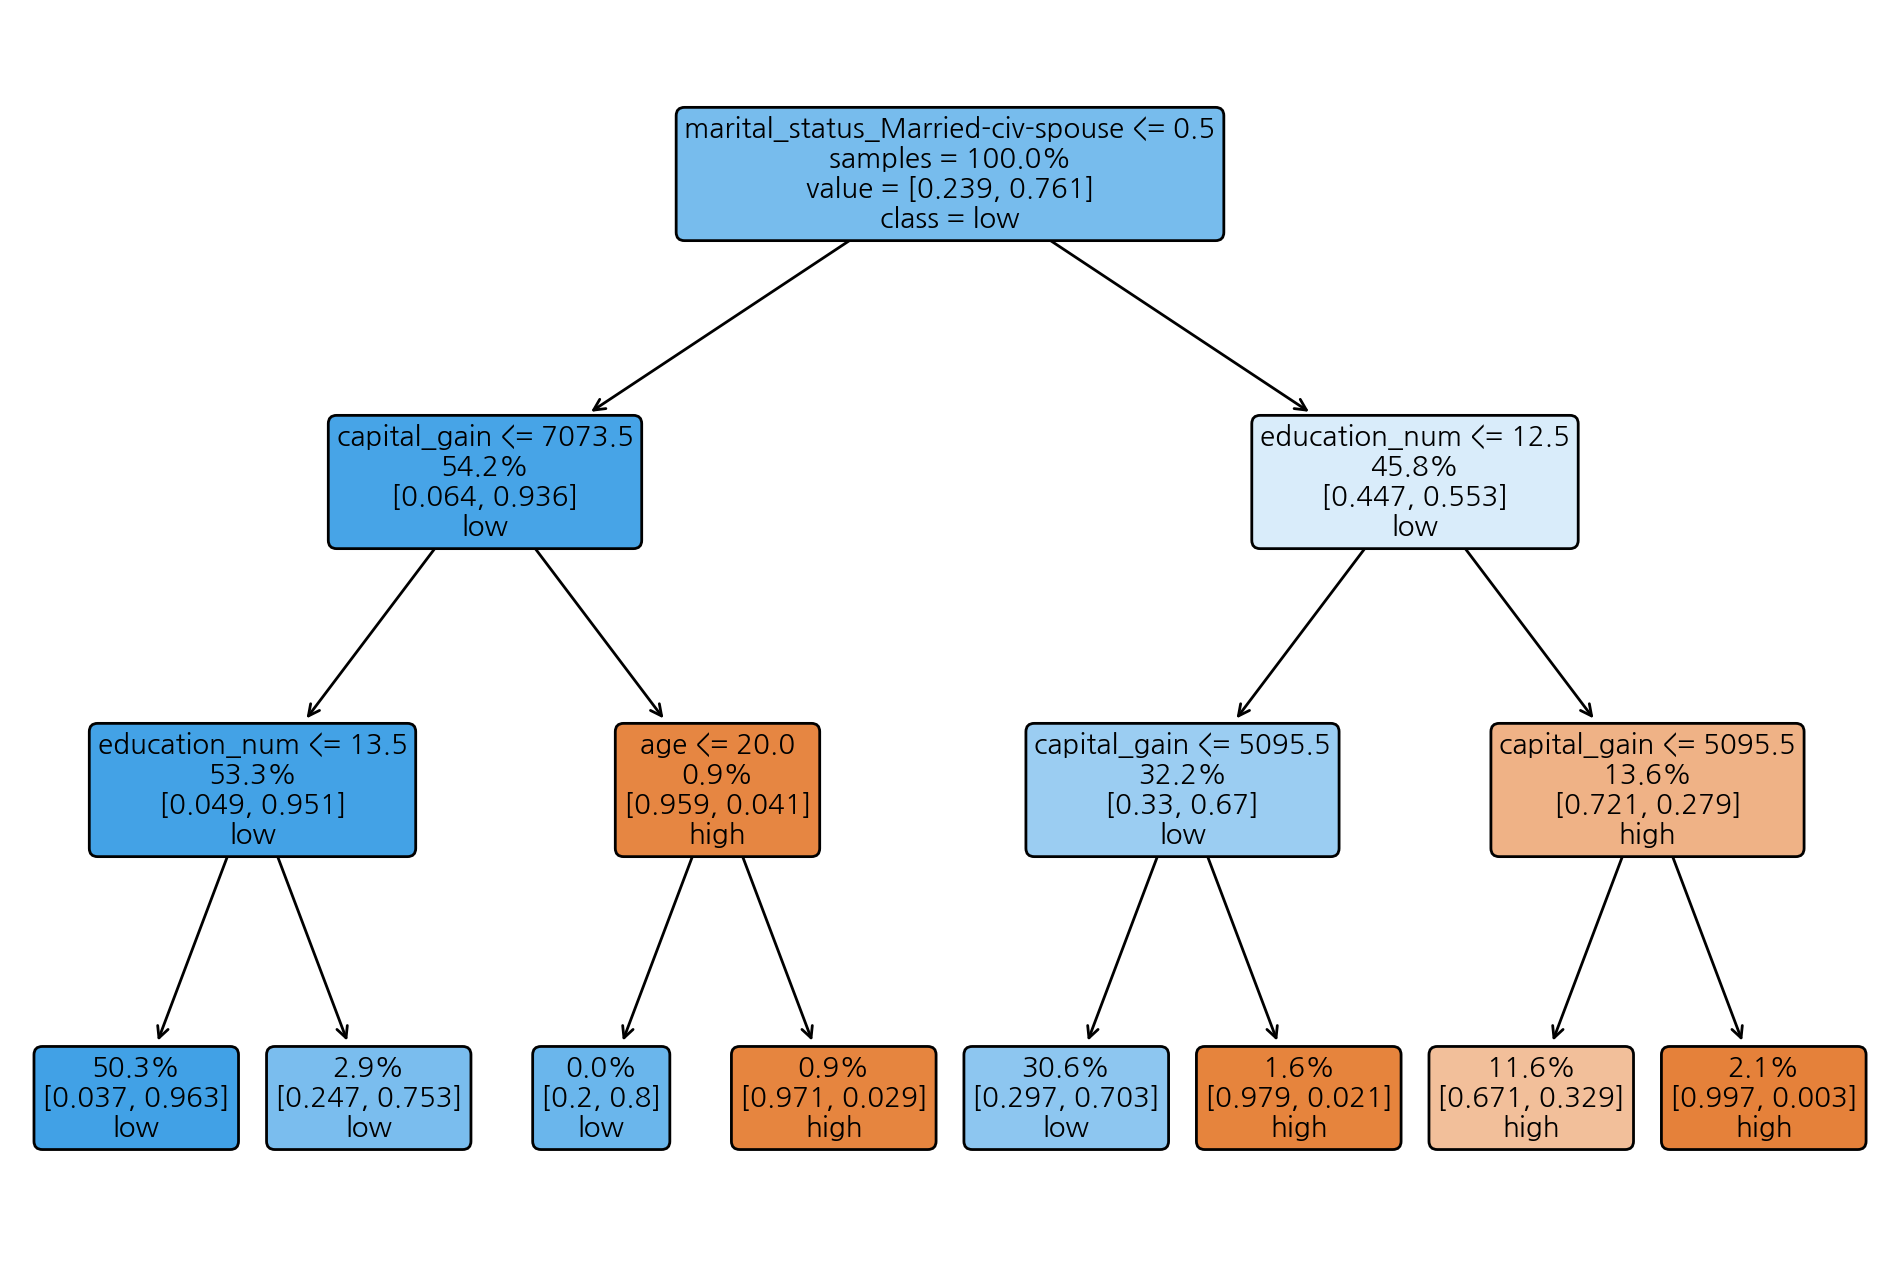

In [ ]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = ['high', 'low'],    # 타겟 변수 클래스, 알파벳순
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = False,                 # 불순도 표시
               label = 'root',                   # label 표시 위치
               fontsize = 10);                   # 글자 크기
# 2단계 노드에서 54.2%와 45.8%를 더하면 100%
# 2단계 왼쪽 노드에서 [0.064, 0.936]: High와 Low의 비율을 표시
# 그러므로 low가 많음, 색상도 파란색

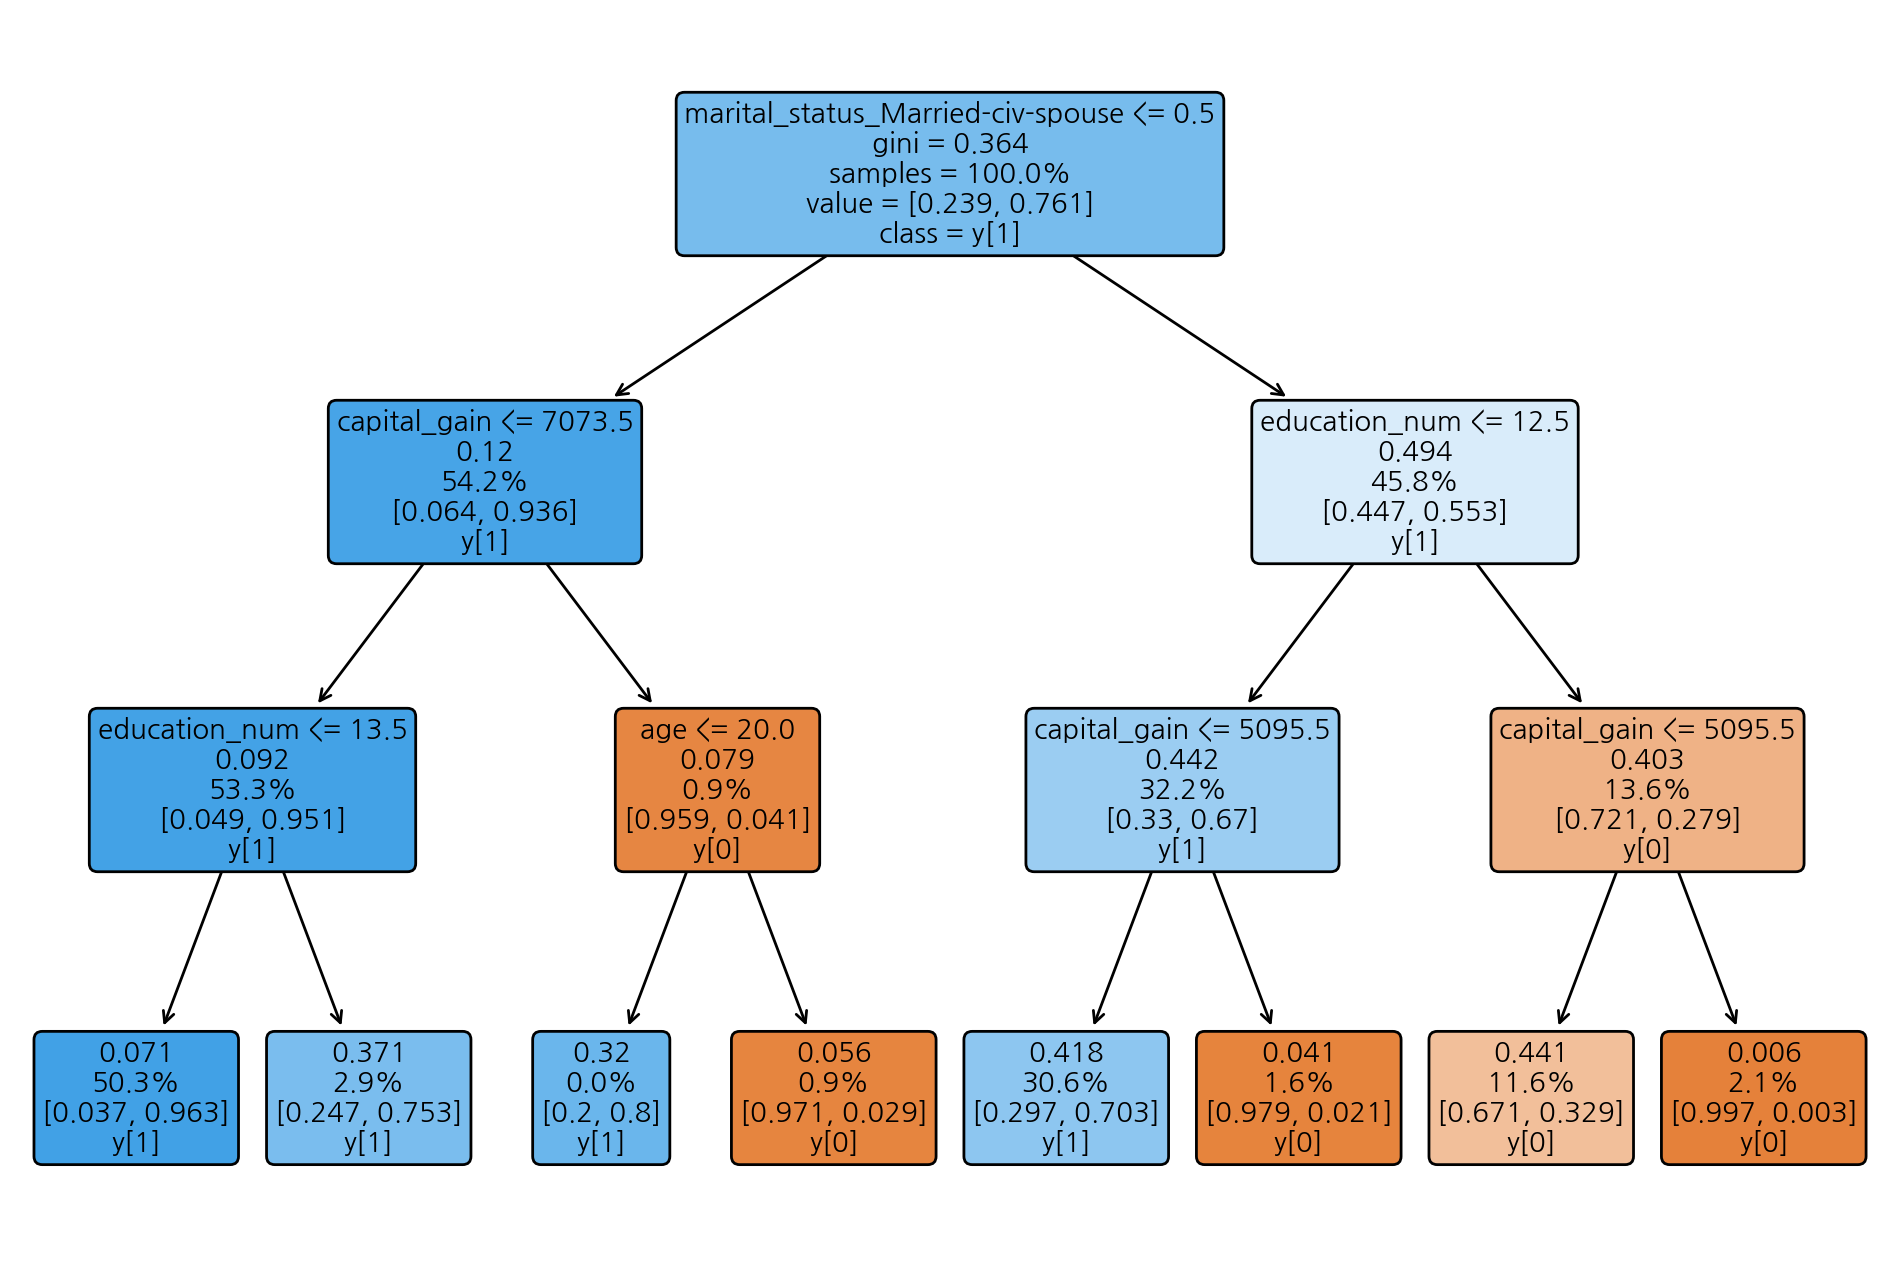

In [ ]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = True,    # 타겟 변수 클래스, 알파벳순
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = True,                 # 불순도 표시
               label = 'root',                   # label 표시 위치
               fontsize = 10);                   # 글자 크기

### value[high, low] 비율
- low 비율이 높으므로 파란색(농도도 다름)
- 노트 표시의 첫 행은 다음 노드를 나누는 기준이며
- 노트 표시의 2행부터는 이 노드의 상태 정보를 표시
    - samples = n%: 전체에서 차지하는 비율
    - value = [m, n]: 이 노드 전체에서 high와 low가 각각 차지하는 비율
    - class = 많은 비율

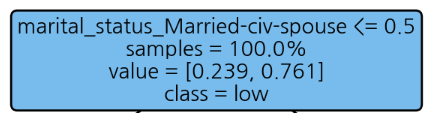


### 모델을 이용해 예측하기

In [ ]:
test_x = df_test.drop(columns = 'income')  # 예측 변수 추출
test_y = df_test['income']                 # 타겟 변수 추출

#### 문제 test_x를 가지고 모델을 통해 예측을 얻어내서 df_test['pred']에 저장

In [ ]:

# 예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,False,False,False,False,False,...,False,False,False,False,False,True,False,False,low,low
24768,39,10,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
26758,31,4,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
14295,23,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
3683,24,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
48445,35,13,10520,0,45,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,high
19639,41,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,low
21606,29,4,0,0,30,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low


In [ ]:
df_test.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia', 'income',
       'pred'],
      dtype='object', length=109)

In [ ]:
df_test.columns[-2:]

Index(['income', 'pred'], dtype='object')

In [ ]:
df_test.columns[:5].append(df_test.columns[-2:])

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'pred'],
      dtype='object')

In [ ]:
df_test[df_test.columns[:5].append(df_test.columns[-2:])]

,age,education_num,capital_gain,capital_loss,hours_per_week,income,pred
11712,58,10,0,0,60,low,low
24768,39,10,0,0,40,low,low
26758,31,4,0,0,20,low,low
14295,23,9,0,0,40,low,low
3683,24,9,0,0,40,low,low
...,...,...,...,...,...,...,...
11985,24,13,0,0,30,low,low
48445,35,13,10520,0,45,high,high
19639,41,9,0,0,40,high,low
21606,29,4,0,0,30,low,low


In [ ]:
display_side_by_side(df_test[['pred']].head(), df_test[['income']].head())

,pred
11712,low
24768,low
26758,low
14295,low
3683,low
,income
11712,low
24768,low
26758,low
14295,low


In [ ]:
# 에측이 잘못된 관측 값 출력
df_test[df_test.pred != df_test.income][['pred', 'income']]

,pred,income
4085,low,high
17604,low,high
32420,low,high
4900,low,high
46618,low,high
...,...,...
20608,low,high
11771,low,high
46223,high,low
32576,low,high


In [ ]:
df_test.query('pred != income')[['pred', 'income']]

,pred,income
4085,low,high
17604,low,high
32420,low,high
4900,low,high
46618,low,high
...,...,...
20608,low,high
11771,low,high
46223,high,low
32576,low,high


### 성능 평가하기

#### confusion matrix 만들기

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'])    # 예측값
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

### labels: 모양과 유사한 모양(n_classes), 기본값=none
- 행렬의 인덱스를 지정할 레이블 목록입니다. 레이블의 하위 집합을 순서를 바꾸거나 선택하는 데 사용할 수 있습니다.
- 지정하지 않으면 y_true 또는 y_pred에서 한 번 이상 나타나는 레이블이 정렬된 순서로 사용됩니다.

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi'     : '100',     # 그래프 크기 설정
                     'figure.figsize' : [5, 3]})  # 해상도 설정

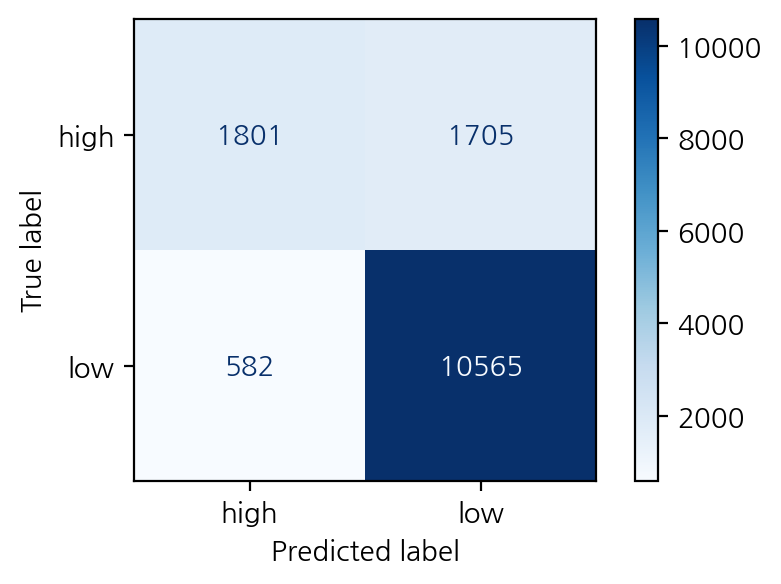

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명

p.plot(cmap = 'Blues');                                       # 컬러맵 적용해 출력

## 혼동행렬 이해

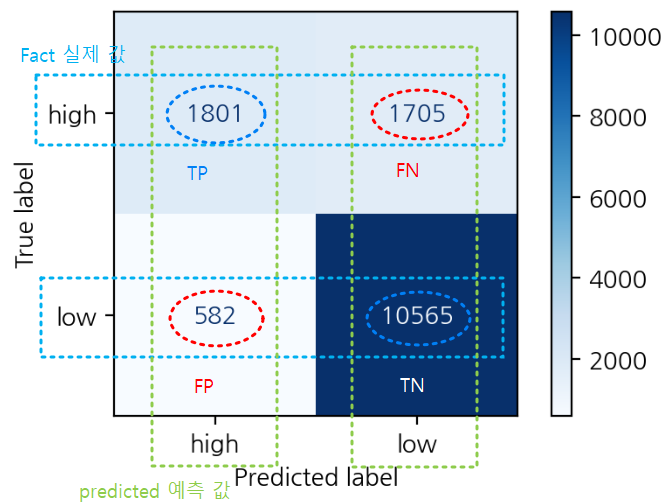

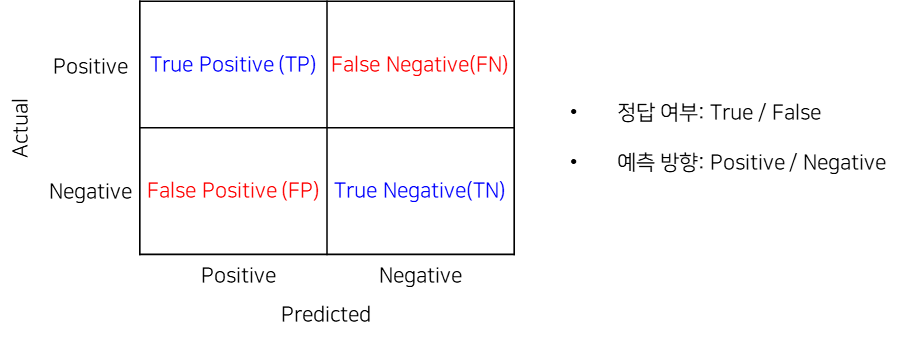

#### 성능 평가 지표 구하기

**accuracy**

- [참고](https://medium.com/@danyal.wainstein1/understanding-the-confusion-matrix-b9bc45ba2679)

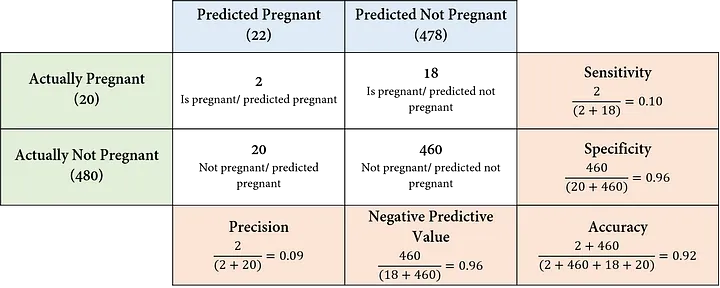

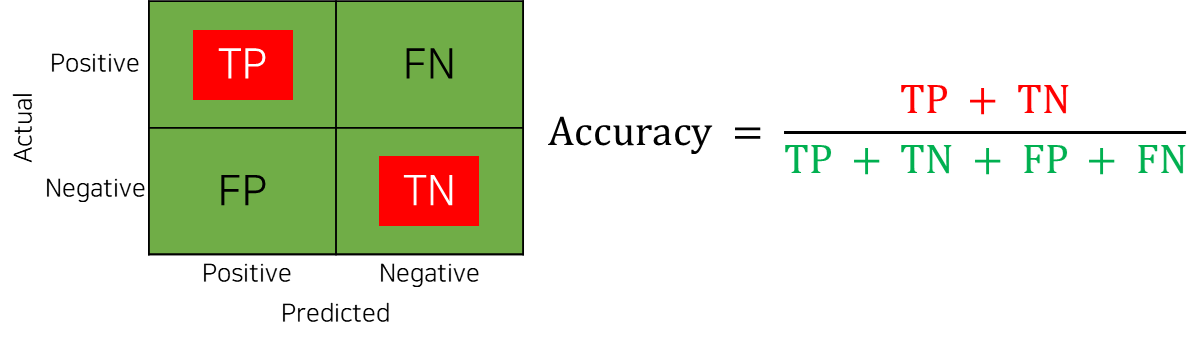

In [ ]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'],  # 실제값
                       y_pred = df_test['pred'])    # 예측값

0.8439227461953184

- [참고](https://velog.io/@siyeon-hwang/Confusion-Matrix)

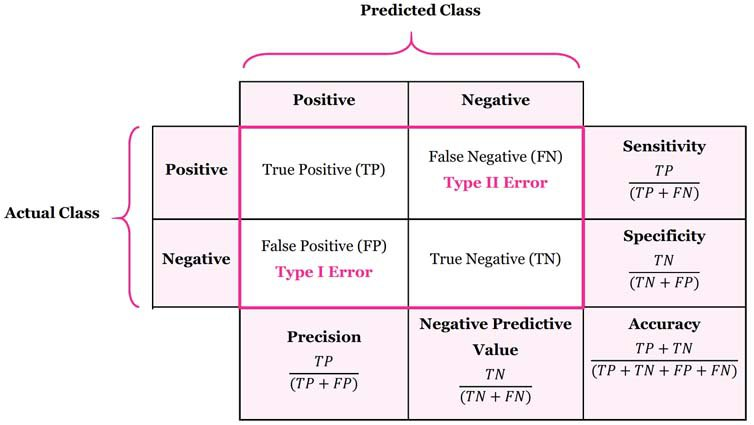

- 이와 같이 Accuracy값을 구할 수 있고 Accuracy값이 높을수록 예측 정확도가 높다고 할 수 있습니다.
    - 여기서 좀 더 파생하여 전체 예측중에 잘 예측한 지표를 구했다면 `(1 - 잘 예측한 것) = 잘 못 예측한 것`인 것을 알 수 있습니다.
- 그래서 Error Rate를 도출할 수 있는데요 에러율을 도출하는 공식은
    - Error Rate = 1 - Accuracy로 나타낼 수 있습니다.
- 하지만 Accuracy는 편향의 함정에 빠질 수 있습니다.
    - 무엇을 뜻하냐면 만일 단일 모델이 실제로 긍정인 것만 예측을 잘하고 부정인 것은 예측을 잘하지 못한다면 좋은 모델이라고 할 수 있을까요?
    - 단편적으로 Accuracy만 봤을 때 좋은 값이 도출될 수 있지만 실제로 부정인 것은 예측을 잘 못하기 때문에 좋은 모델이라고 선언하기는 힘들 것 같습니다.
    - 이러한 결과가 도출되는 것은 데이터가 불균형(imbalanced)하기 때문에 벌어지는 상황인데요.
- 이렇게 데이터가 불균형하다면 측정할 수 있는 방법은 없을까요?
    - 있습니다. 바로 F1 Score로 측정하는 것인데요.

**precision**
- income을 high로 예측한 사람 중에서 실제로 high인 사람의 비율
- Positive로 예측한 것 중 실제로 Positive가 얼마나 되는지를 보여주는 지표로써 후에 얼마나 정밀한 지표측정인지를 나타낼 수 있음

In [ ]:
metrics.precision_score(y_true = df_test['income'],  # 실제값
                        y_pred = df_test['pred'],    # 예측값
                        pos_label = 'high')          # 관심 클래스

0.7557700377675199

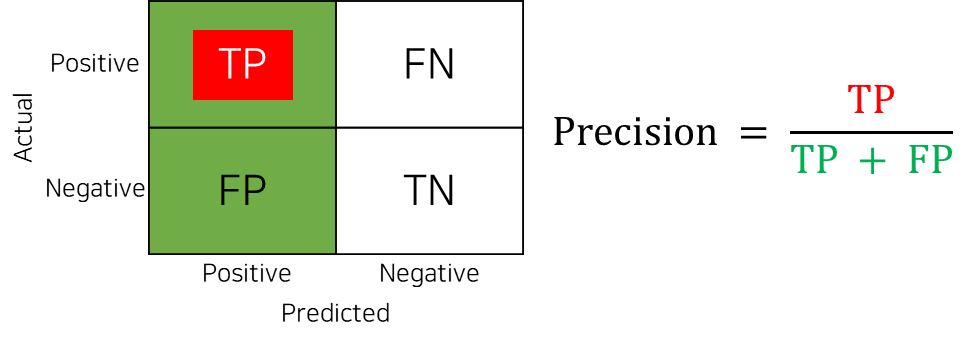

# [참고](https://shinminyong.tistory.com/28)

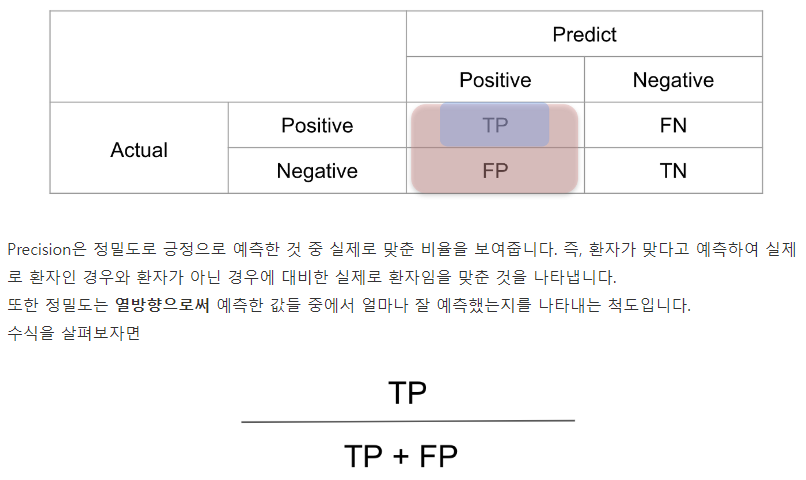

**recall** (Sensitivity, 민감도)
- 실제 환자에 대해서 환자라고 예측하고, 환자가 아니다라고 예측한 것에 대한 실제 환자를 예측한 비율을 나타냅니다.
- 정확도랑 마찬가지로 실제 환자를 환자로 예측하는 비율로 민감도가 높을수록 좋은 척도라고 할 수 있습니다.

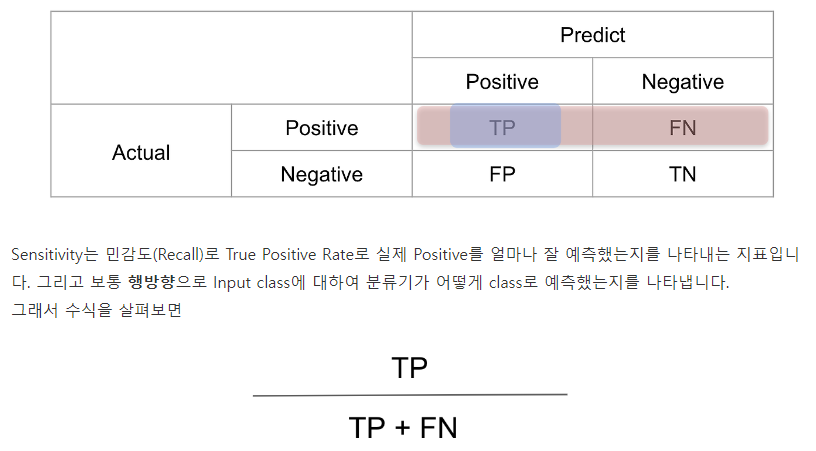

### 재현율(recall)은 민감도(sensitivity)라고도 부르며 ‘실제 데이터에서 관심 클래스를 찾아낸 비율’을 의미한다.

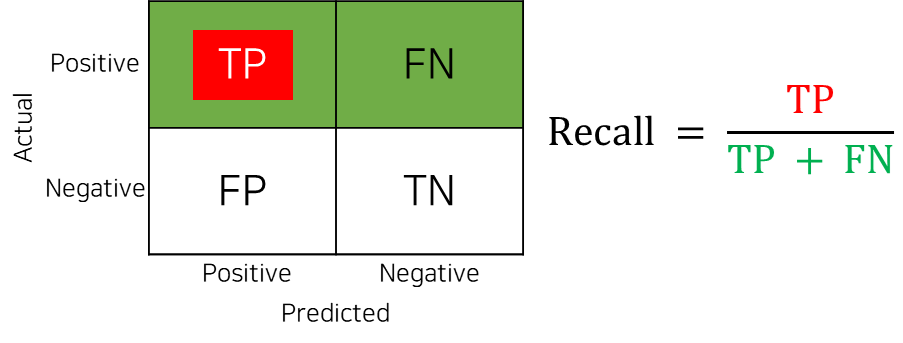

In [ ]:
metrics.recall_score(y_true = df_test['income'],  # 실제값
                     y_pred = df_test['pred'],    # 예측값
                     pos_label = 'high')          # 관심 클래스

0.5136908157444381

**F1 score**

- F1 Score는 보통 불균형 분류문제에서 평가척도로 주로 사용됩니다.
    - 데이터가 불균형한 상태에서 Accuracy로 성능을 평가하기엔 데이터 편향성이 너무 크게 나타나 올바르게 성능을 측정하기 힘들게 됩니다.
    - 그렇기 때문에 F1 Score를 평가척도로 사용합니다.
- 그렇다면 왜 불균형 데이터 상태에서는 F1 Score를 이용할까요?
    - 위에서 설명한 Sensitivity와 Precision을 이용하여 조화평균을 구하여 평가 척도를 구성했기 때문인데요.

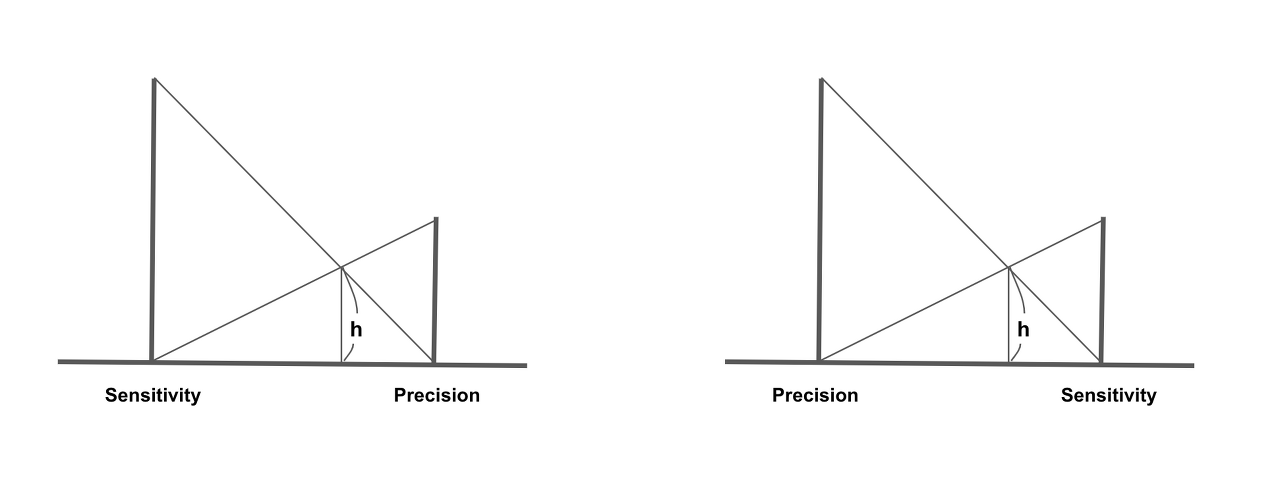

- 두개 값의 크기가 서로 다른 형태를 나타내고 있는 불균형 상태이지만 이를 조화평균 함으로써 큰 값의 크기에 대한 가중치를 낮추고 작은 값에 더 맞춰주는 과정을 거쳐서 불균형 데이터일지라도 값의 크기 차이가 어느정도 상쇄되기 때문에 F1 Score는 불균형 데이터에서의 주요 척도로써 사용되고 있습니다.

- 수식은 다음과 같습니다.(헷갈리시면 안되는게 Sensitiviy는 Recall(재현도)은 같습니다.)

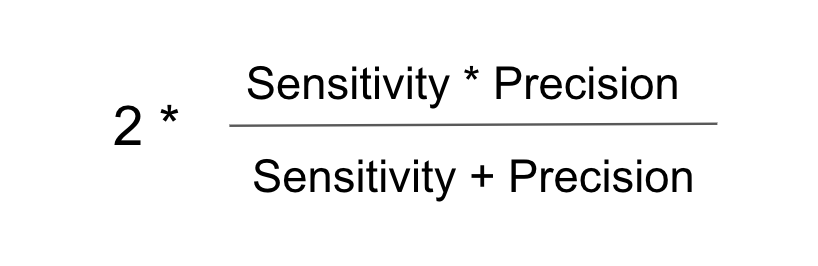



In [ ]:
metrics.f1_score(y_true = df_test['income'],  # 실제값
                 y_pred = df_test['pred'],    # 예측값
                 pos_label = 'high')          # 관심 클래스

0.6116488368143997

### 조화평균은 '역수의 산술평균의 역수'
- 주어진 수들의 역수를 구해 산술평균을 구한 다음 다시 역수를 구하면 조화평균이 됨.
- F1 score를 구할 때 주어진 수들의 합을 수의 개수로 나누는 산술평균이 아니라 조화평균을 이용하는 이유는 recall과 precision 중 하나라도 작으면 값을 크게 낮추기 위해서임.
    - 예를 들어 recall이 99%, precision이 1%일 때 산술평균을 구하면 50%지만, 조화평균을 구하면 1.98%임.

- 산술평균: (0.99 + 0.01) / 2 = 0.5
- 조화평균: 2 * (0.99 * 0.01) / (0.99 + 0.01) = 0.0198

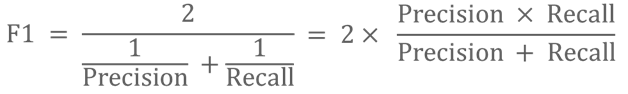

### 조화평균의 의미

- 수학에서 조화 평균(調和平均)은 주어진 수들의 역수의 산술 평균의 역수를 말한다.
- 평균적인 변화율을 구할 때에 주로 사용된다. 실수 a1, ..., an이 주어졌을 때,
    - 조화 평균 H는

    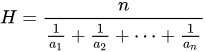

- 이 평균은 주로 속도의 평균, 주파수의 평균에 많이 사용된다. 속도는 주어진 시간에 대비하여 이동한 거리의 비율이기 때문에 비율에 사용되는 조화평균이 사용되는 것이다.

- 예를 들어 어떤 사람이 A부터 B지점까지 이동하는데 갈때는 시속 30Km, 올 때는 시속 60Km로 갔다왔다고 가정하자.

- A부터 B지점까지 거리가 60Km라면 갈때는 2시간, 올떄는 1시간이 걸렸을 것이다. 따라서 총 120Km를 이동하는데 3시간이 걸렸으므로 전체 속도는 40Km일 것이다.

- 만약 산술 평균으로 속도를 구했다면 (30 + 60) / 2 = 45Km일 것이다.

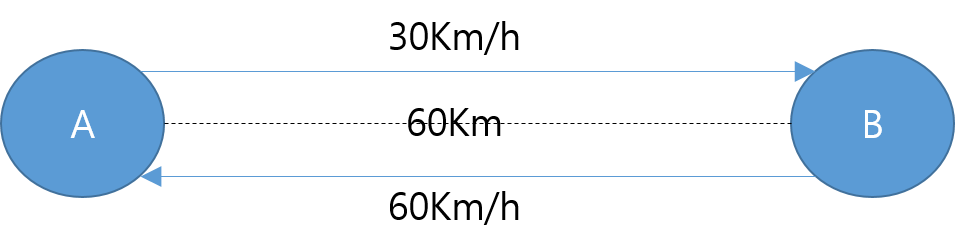



In [ ]:
a, b = 30, 60
print(f'산술평균 = {(a + b)/ 2}, 조화평균 = {2 / (1/a + 1/b)}')

산술평균 = 45.0, 조화평균 = 40.0


---

### 정리하기

In [ ]:
## 1. 전처리

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('adult.csv')

# 1. 타겟 변수 전처리
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')

# 2. 불필요한 변수 제거하기
df = df.drop(columns = 'fnlwgt')

# 3. 문자 타입 변수를 숫자 타입으로 바꾸기
target = df['income']             # income 추출
df = df.drop(columns = 'income')  # income 제거
df = pd.get_dummies(df)           # 원핫 인코딩으로 변환
df['income'] = target             # df에 target 삽입

# 4. 데이터 분할하기
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율
                                     stratify = df['income'],  # 타겟 변수 비율 유지
                                     random_state = 1234)      # 난수 고정


## 2. 의사결정나무 모델 만들기

# 모델 설정하기
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정
                                  max_depth = 3)        # 나무 깊이

# 모델 만들기
train_x = df_train.drop(columns = 'income')             # 예측 변수 추출
train_y = df_train['income']                            # 타겟 변수 추출
model = clf.fit(X = train_x, y = train_y)               # 모델 만들기

# 모델 구조 살펴보기
import matplotlib.pyplot as plt
tree.plot_tree(model,
               feature_names = train_x.columns,    # 예측 변수명
               class_names = ['high', 'low'],      # 타겟 변수 클래스, 알파벳순
               proportion = True,                  # 비율 표기
               filled = True,                      # 색칠
               rounded = True,                     # 둥근 테두리
               impurity = False,                   # 불순도 표시
               label = 'root',                     # label 표시 위치
               fontsize = 12)                      # 글자 크기


## 3. 모델을 이용해 예측하기

# 예측하기
test_x = df_test.drop(columns = 'income')    # 예측 변수 추출
test_y = df_test['income']                   # 타겟 변수 추출
df_test['pred'] = model.predict(test_x)      # 예측값 구하기

## 4. 성능 평가하기

# confusion matrix 만들기
from sklearn import metrics
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서

# confusion matrix 시각화
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명
p.plot(cmap = 'Blues')                                        # 컬러맵 적용해 출력

# accuracy
metrics.accuracy_score(y_true = df_test['income'],   # 실제값
                       y_pred = df_test['pred'])     # 예측값

# precision
metrics.precision_score(y_true = df_test['income'],  # 실제값
                        y_pred = df_test['pred'],    # 예측값
                        pos_label = 'high')          # 관심 클래스

# recall
metrics.recall_score(y_true = df_test['income'],     # 실제값
                     y_pred = df_test['pred'],       # 예측값
                     pos_label = 'high')             # 관심 클래스

# F1 score
metrics.f1_score(y_true = df_test['income'],         # 실제값
                 y_pred = df_test['pred'],           # 예측값
                 pos_label = 'high')                 # 관심 클래스
